# Student Marks Prediction Based on Study Hours

## Data Processing

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
dataset = pd.read_csv('data/01Students.csv')
df = dataset.copy()
df

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


### Check for missing values

In [4]:
df.isnull().sum()

Hours    0
Marks    0
dtype: int64

### Splitting df into variables (independent/dependent)

In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
X, y

(    Hours
 0       0
 1       1
 2       1
 3       1
 4       1
 5       2
 6       2
 7       3
 8       3
 9       3
 10      3
 11      4
 12      4
 13      4
 14      5
 15      5
 16      6
 17      6
 18      7
 19      7
 20      7
 21      7
 22      8
 23      8
 24      9
 25      9
 26      9
 27     10
 28     10
 29     11,
 0     34
 1     36
 2     33
 3     39
 4     42
 5     45
 6     38
 7     45
 8     53
 9     46
 10    56
 11    59
 12    55
 13    56
 14    72
 15    59
 16    62
 17    71
 18    78
 19    88
 20    61
 21    74
 22    71
 23    89
 24    82
 25    67
 26    89
 27    81
 28    82
 29    79
 Name: Marks, dtype: int64)

### Splitting dataset into train/test

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
X_train, X_test

(    Hours
 13      4
 22      8
 24      9
 0       0
 2       1
 27     10
 26      9
 18      7
 5       2
 16      6
 25      9
 11      4
 9       3
 17      6
 29     11
 20      7
 12      4
 21      7
 6       2
 19      7
 15      5,
     Hours
 7       3
 10      3
 4       1
 1       1
 28     10
 8       3
 3       1
 23      8
 14      5)

In [6]:
y_train, y_test

(13    56
 22    71
 24    82
 0     34
 2     33
 27    81
 26    89
 18    78
 5     45
 16    62
 25    67
 11    59
 9     46
 17    71
 29    79
 20    61
 12    55
 21    74
 6     38
 19    88
 15    59
 Name: Marks, dtype: int64,
 7     45
 10    56
 4     42
 1     36
 28    82
 8     53
 3     39
 23    89
 14    72
 Name: Marks, dtype: int64)

### Train the regression model

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predict with test split

In [8]:
y_pred = regressor.predict(X_test)
y_pred

array([49.35373808, 49.35373808, 39.29954842, 39.29954842, 84.54340191,
       49.35373808, 39.29954842, 74.48921224, 59.40792775])

In [10]:
np.concatenate([y_test.values.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)], axis=1)

array([[45.        , 49.35373808],
       [56.        , 49.35373808],
       [42.        , 39.29954842],
       [36.        , 39.29954842],
       [82.        , 84.54340191],
       [53.        , 49.35373808],
       [39.        , 39.29954842],
       [89.        , 74.48921224],
       [72.        , 59.40792775]])

### Evaluate the model performance

In [13]:
score = regressor.score(X_test, y_test)
score

0.8445283770796628

#### coefficient of the line

In [14]:
coefficients = regressor.coef_
intercept = regressor.intercept_
coefficients, intercept

(array([5.02709483]), np.float64(34.272453587556456))

#### Equation y = 34.27 + 5.02x

In [15]:
# y = 34.27 + 5.02x

### How much error our model has made (RMSE error)

In [16]:
from sklearn.metrics import mean_squared_error
import math
regressor_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
regressor_rmse

7.228680413688943

### Plot the predictions

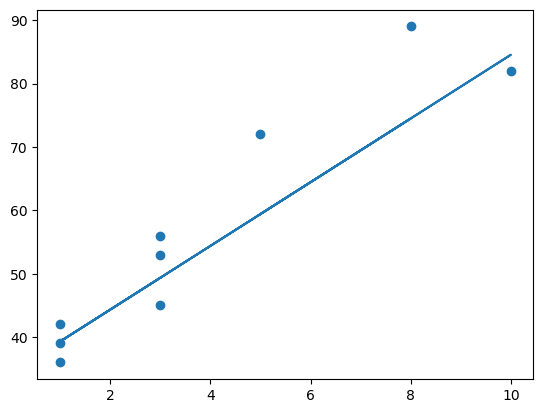

In [18]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)

## Residuals

In [20]:
marks_predicted = regressor.predict(X)
marks_predicted

array([34.27245359, 39.29954842, 39.29954842, 39.29954842, 39.29954842,
       44.32664325, 44.32664325, 49.35373808, 49.35373808, 49.35373808,
       49.35373808, 54.38083292, 54.38083292, 54.38083292, 59.40792775,
       59.40792775, 64.43502258, 64.43502258, 69.46211741, 69.46211741,
       69.46211741, 69.46211741, 74.48921224, 74.48921224, 79.51630707,
       79.51630707, 79.51630707, 84.54340191, 84.54340191, 89.57049674])

In [21]:
residuals = y - marks_predicted
residuals

0     -0.272454
1     -3.299548
2     -6.299548
3     -0.299548
4      2.700452
5      0.673357
6     -6.326643
7     -4.353738
8      3.646262
9     -3.353738
10     6.646262
11     4.619167
12     0.619167
13     1.619167
14    12.592072
15    -0.407928
16    -2.435023
17     6.564977
18     8.537883
19    18.537883
20    -8.462117
21     4.537883
22    -3.489212
23    14.510788
24     2.483693
25   -12.516307
26     9.483693
27    -3.543402
28    -2.543402
29   -10.570497
Name: Marks, dtype: float64

(array([2., 2., 6., 5., 5., 3., 3., 1., 2., 1.]),
 array([-12.51630707,  -9.41088811,  -6.30546914,  -3.20005018,
         -0.09463121,   3.01078776,   6.11620672,   9.22162569,
         12.32704466,  15.43246362,  18.53788259]),
 <BarContainer object of 10 artists>)

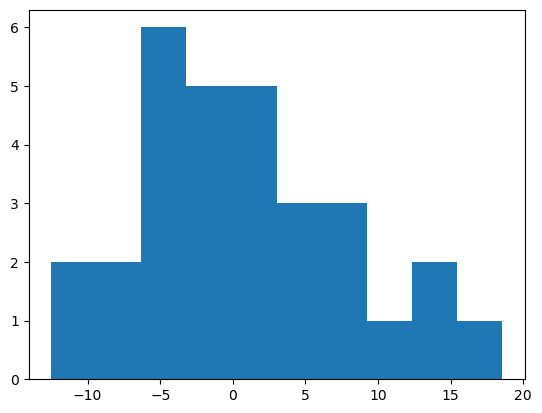

In [32]:
plt.hist(residuals)

In [23]:
residuals_df = residuals.to_frame()
residuals_df

,Marks
0,-0.272454
1,-3.299548
2,-6.299548
3,-0.299548
4,2.700452
5,0.673357
6,-6.326643
7,-4.353738
8,3.646262
9,-3.353738


In [30]:
from scipy import stats
stats.zscore(residuals)

array([-0.17782273, -0.60533708, -1.02902485, -0.18164931,  0.24203846,
       -0.04424664, -1.03285144, -0.75421951,  0.37561455, -0.61299025,
        0.79930232,  0.51301723, -0.0518998 ,  0.08932945,  1.6390247 ,
       -0.19695564, -0.48324074,  0.78782257,  1.0664545 ,  2.47874708,
       -1.33444287,  0.50153748, -0.63212316,  1.91000346,  0.2114258 ,
       -1.90701306,  1.2000306 , -0.63977633, -0.49854707, -1.63220771])

In [24]:
from sklearn.preprocessing import StandardScaler
scaler_ = StandardScaler()
residual_zscore = scaler_.fit_transform(residuals_df)
residual_zscore

array([[-0.17782273],
       [-0.60533708],
       [-1.02902485],
       [-0.18164931],
       [ 0.24203846],
       [-0.04424664],
       [-1.03285144],
       [-0.75421951],
       [ 0.37561455],
       [-0.61299025],
       [ 0.79930232],
       [ 0.51301723],
       [-0.0518998 ],
       [ 0.08932945],
       [ 1.6390247 ],
       [-0.19695564],
       [-0.48324074],
       [ 0.78782257],
       [ 1.0664545 ],
       [ 2.47874708],
       [-1.33444287],
       [ 0.50153748],
       [-0.63212316],
       [ 1.91000346],
       [ 0.2114258 ],
       [-1.90701306],
       [ 1.2000306 ],
       [-0.63977633],
       [-0.49854707],
       [-1.63220771]])

(array([2., 2., 6., 5., 5., 3., 3., 1., 2., 1.]),
 array([-1.90701306, -1.46843705, -1.02986103, -0.59128502, -0.15270901,
         0.28586701,  0.72444302,  1.16301903,  1.60159505,  2.04017106,
         2.47874708]),
 <BarContainer object of 10 artists>)

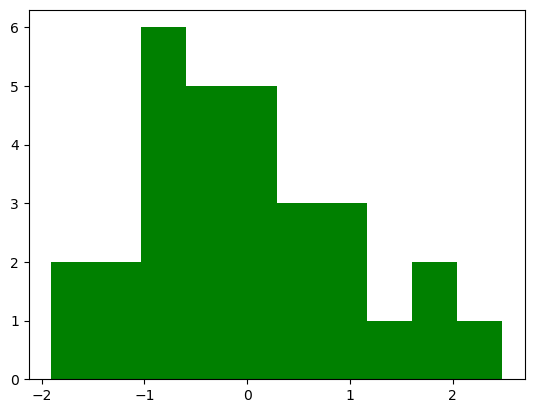

In [28]:
plt.hist(residual_zscore, linewidth=0.9, color='g')